In [1]:
import math

# measured values with one turn over torroid.
od = 15.41 #mm
id = 8 #mm
width = 6.2 #mm, the h symbol in the formula above
turns=1 #use least turns possible to minimise self resonance effects
L=0.08 #uH  @ 10kHz

#The initial permeability defines the relative permeability at low excitation level.
#According to IEC 60401 test condition : f<= 10 KHz, B < 0.25mT, 25


# notice that the formula adapted to uH
mu_init = L/(0.0002*width*turns**2*math.log(od/id))
print("initial relative magnetic permeability of the core = ", mu_init, "[dimensionless quantity]")

initial relative magnetic permeability of the core =  98.41149897120059 [dimensionless quantity]


In [2]:
#width is the h symbol in the formula above
al=0.2*mu_init*width*math.log(od/id)
print("Al=",al, "nano henries per square turn")

mu_0=4e-7*math.pi # magnetic constant
a_over_l=al/(mu_0*mu_init*1e9);
print("A/l=",a_over_l)


Al= 80.00000000000001 nano henries per square turn
A/l= 0.000646895717495253


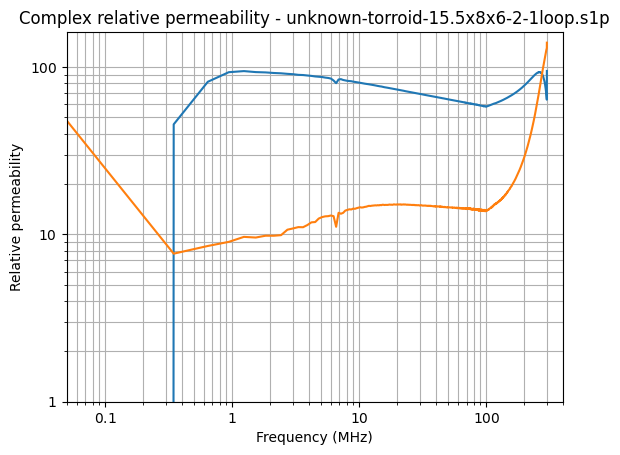

In [3]:
import matplotlib.pyplot as plt
import skrf as rf
import numpy

file1='unknown-torroid-15.5x8x6-2-1loop.s1p'

nw1=rf.Network(file1)
# notice how measured Z (resistance, reactance) is inverted down below, 
# mu = Z*a_over_l/(2*pi*f*N2*1j*mu_0)
# when a complex number is divided by 1j the real part value become imaginary 
# and the imaginary become the real.
# permeability affects inductance i.e. reactance part of Z, the real part of Z are ohmic losses
# in the plot below we use mu.real for inductance
# and mu.imag for losses
mu=(nw1.z[:,0,0]/turns**2/(2*math.pi*nw1.f)/1j)/(mu_0*a_over_l)

plt.figure()
plt.rcParams['axes.formatter.min_exponent'] = 4
plt.plot(nw1.f/1e6,mu.real,label='mu1')
plt.plot(nw1.f/1e6,-mu.imag,label='mu2')
plt.xscale('log')
plt.yscale('log')
#plt.legend(('$\mu\'\ inductance$','$\mu\'\'\ loss$'),loc='upper right',shadow=True)
plt.ylim(bottom=1)
plt.xlim(left=0.05, right=400)
plt.ylabel('Relative permeability')
plt.xlabel('Frequency (MHz)')
plt.title('Complex relative permeability - {}'.format(file1))
plt.grid(True, which="both")
plt.show()